# You work for an e-commerce company, and your task is to group customers into distinct clusters based on their shopping behavior and preferences using the K-Means clustering algorithm. The dataset contains customer information, purchase history, and browsing data. Your goal is to create customer clusters for targeted marketing and personalized recommendations. Answer the following questions based on this case study:
Data Exploration:
a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features and the data distribution.

b. Discuss the importance of customer clustering in the e-commerce industry.

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Memberdata.csv')  # Replace 'Memberdata.csv' with the actual file path

# Display the first few rows of the dataset to get an overview
print(df.head())

# Get information about the dataset, including data types and missing values
print(df.info())

# Summary statistics to describe the data distribution
print(df.describe())

   Member    Order       SKU   Created On   Description
0  M09736  6468572  34993740  41904.94792  Other Sauces
1  M09736  6468572  15669800  41904.94792       Cashews
2  M09736  6468572  34989501  41904.94792    Other Dals
3  M09736  6468572   7572303  41904.94792       Namkeen
4  M09736  6468572  15669856  41904.94792         Sugar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       626 non-null    object
 1   Order        626 non-null    int64 
 2   SKU          626 non-null    int64 
 3   Created On   626 non-null    object
 4   Description  626 non-null    object
dtypes: int64(2), object(3)
memory usage: 24.6+ KB
None
              Order           SKU
count  6.260000e+02  6.260000e+02
mean   7.623964e+06  1.977172e+07
std    7.052373e+05  1.485729e+07
min    6.468572e+06  7.547323e+06
25%    6.734605e+06  1.566842e+07
50%    8.0393

# 2. Data Preprocessing:
a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.

In [2]:
df.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
df.columns

Index(['Member', 'Order', 'SKU', 'Created On', 'Description'], dtype='object')

In [ ]:
# To drop columns Member,created on,Description

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Memberdata.csv')  # Replace 'Memberdata.csv' with the actual file path

# Drop the specified columns: 'Member', 'Created On', and 'Description'
columns_to_drop = ['Member', 'Created On', 'Description']
df = df.drop(columns=columns_to_drop)

# Save the modified dataset to your system
df.to_csv('Modified_Memberdata.csv', index=False)

# The modified dataset, excluding the specified columns, is saved to 'Modified_Memberdata.csv' in the current working directory.

# 3. Implementing K-Means:
a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster customers based on their features.

b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWa

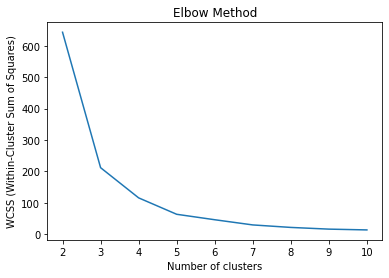

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWa

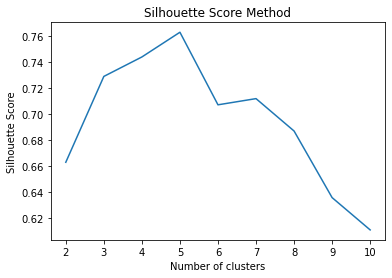

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


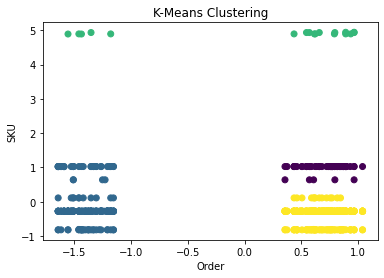

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the preprocessed dataset
df = pd.read_csv('Modified_Memberdata.csv')  # Replace with the path to your preprocessed data

# Select the features for clustering
features = df[['Order', 'SKU']]  # Adjust features as needed

# Standardize the features (important for K-Means)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Determine an appropriate number of clusters (K)

# Method 1: Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

# Method 2: Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

# Choose the appropriate K based on the above methods and domain knowledge

# Once you've chosen K, perform K-Means clustering
k = 4  # Adjust K based on your analysis
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters (for 2D data)
plt.scatter(features[:, 0], features[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Order')
plt.ylabel('SKU')
plt.title('K-Means Clustering')
plt.show()

# The 'Cluster' column now contains cluster assignments for each data point

# 4. Model Training:
a. Train the K-Means model using the preprocessed customer dataset.

b. Discuss the distance metric used for cluster assignment and its significance in customer clustering

C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


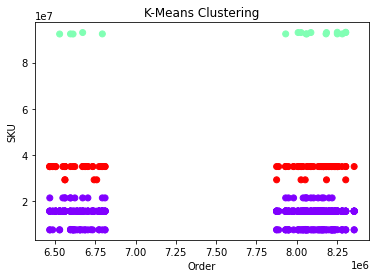

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('Modified_Memberdata.csv')  # Replace with the path to your preprocessed data

# Choose the features for clustering (excluding any non-relevant columns)
features = df[['Order', 'SKU']]  # Update with relevant features

# Implement K-Means clustering
k = 3  # Choose the number of clusters (you can adjust this as needed)
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters (for 2D or 3D data)
# This is a simple example; adjust the visualization based on your feature space
plt.scatter(features['Order'], features['SKU'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Order')
plt.ylabel('SKU')
plt.title('K-Means Clustering')
plt.show()

# The 'Cluster' column now contains cluster assignments for each data point

# 5. Customer Clustering:
a. Assign customers to their respective clusters based on their features.

b. Visualize the customer clusters and analyze the characteristics of each cluster.

In [8]:
# Assuming you have already trained the K-Means model and have 'Cluster' column
# in your DataFrame

# Display the cluster assignments for each customer
cluster_assignments = df['Cluster']
print(cluster_assignments)

0      2
1      0
2      2
3      0
4      0
      ..
621    0
622    0
623    0
624    0
625    0
Name: Cluster, Length: 626, dtype: int32


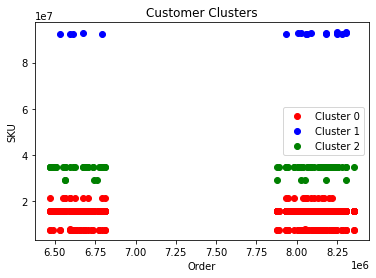

                Order           SKU
Cluster                            
0        7.629475e+06  1.441518e+07
1        7.729802e+06  9.270685e+07
2        7.575297e+06  3.445586e+07


In [9]:
import matplotlib.pyplot as plt

# Assuming you have already trained the K-Means model and have 'Cluster' column
# in your DataFrame

# Visualize the clusters based on two features (e.g., 'Order' and 'SKU')
plt.scatter(df[df['Cluster'] == 0]['Order'], df[df['Cluster'] == 0]['SKU'], c='red', label='Cluster 0')
plt.scatter(df[df['Cluster'] == 1]['Order'], df[df['Cluster'] == 1]['SKU'], c='blue', label='Cluster 1')
plt.scatter(df[df['Cluster'] == 2]['Order'], df[df['Cluster'] == 2]['SKU'], c='green', label='Cluster 2')
# Add more clusters if necessary

plt.xlabel('Order')
plt.ylabel('SKU')
plt.title('Customer Clusters')
plt.legend()
plt.show()

# Analyze cluster characteristics (e.g., means of features)
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# 6. Performance Metrics:
a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.

b. Calculate the silhouette score for the customer clusters and Interpret the results.

In [10]:
from sklearn.metrics import silhouette_score

# Assuming you have already trained the K-Means model and have 'Cluster' column in your DataFrame
cluster_assignments = df['Cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, cluster_assignments)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8446915252534727


C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nirmala\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWa

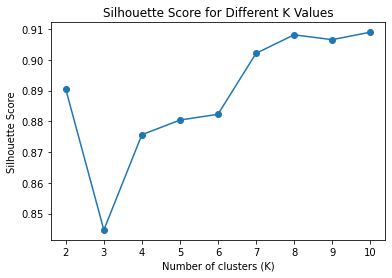

In [11]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_assignments = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

# Visualize the silhouette scores and choose the optimal K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()